# Getting input
saving Adjacency matrix with weight of edges

In [10]:
graph = []
n = int(input("Number of cities: "))
x = []
y = []
s = list(map(float, input().split()))
for i in range(0, len(s)-2, 3):
    graph.append([-1 for i in range(n)])
    a, x_in, y_in = s[i], s[i+1], s[i+2]
    x.append(x_in)
    y.append(y_in)
print(a, len(x), len(y))

for i in range(n):
    for j in range(n):
        dis = ((x[i] - x[j])**2 + (y[i] - y[j])**2) ** 0.5
        graph[i][j] = dis
        graph[j][i] = dis

#sample view
print("Sample ###############")
for i in range(4):
    for j in range(4):
        print(graph[i][j], end=' ')
    print('\n')


Number of cities: 229
1 68.58 33.05  2 64.34 40.32  3 59.55 30.15  4 59.25 24.45  5 56.57 24.06  6 54.43 20.30  7 54.41 25.19  8 53.54 27.34  9 49.50 24.00  10 50.26 30.31  11 46.28 30.44  12 55.45 37.35  13 56.20 44.00  14 55.45 49.08  15 53.12 50.09  16 51.40 39.10  17 50.00 36.15  18 48.27 34.59  19 44.36 33.32  20 47.14 39.42  21 48.44 44.25  22 46.21 48.03  23 41.43 44.49  24 40.11 44.30  25 40.23 49.51  26 58.00 56.15  27 56.51 60.36  28 67.27 63.58  29 69.20 88.06  30 55.00 73.24  31 55.02 82.55  32 56.01 92.50  33 49.50 73.10  34 43.15 76.57  35 41.20 69.18  36 39.40 66.48  37 38.35 68.48  38 43.48 87.35  39 52.16 104.20  40 47.55 106.53  41 52.03 113.30  42 62.13 129.49  43 64.45 177.29  44 53.01 158.39  45 59.34 150.48  46 50.17 127.32  47 50.35 137.02  48 48.27 135.06  49 46.58 142.42  50 43.10 131.56  51 41.01 28.58  52 38.25 27.09  53 39.56 32.52  54 38.43 35.30  55 39.45 37.02  56 39.55 41.17  57 37.55 40.14  58 37.01 35.18  59 36.12 37.10  60 34.44 36.43  61 33.30 36.18 

# Creating random chromosomes
generating a random permutation 

In [12]:
import random
def first_population(number_of_samples, size):
    l = []
    for i in range(number_of_samples):
        chromosome = []
        for j in range(size):
            a = random.randint(0,size-1)
            while a in chromosome:
                a = random.randint(0,size-1)
            chromosome.append(a)
        l.append(chromosome)
    return l

first_population(3,5)
                

[[3, 0, 2, 4, 1], [0, 1, 4, 3, 2], [3, 2, 1, 0, 4]]

# Fitness function (sum of weights in chromosome path)

In [13]:
def fitness(chromosome):
    w = 0
    for i in range(len(chromosome)):
        w += graph[chromosome[i]][chromosome[(i+1) % len(chromosome)]]
    return w

chromosome = first_population(1,29)[0]
print(chromosome)
print(fitness(chromosome))

[20, 7, 23, 11, 8, 25, 0, 9, 27, 22, 18, 28, 1, 4, 3, 26, 6, 10, 2, 13, 16, 19, 5, 21, 15, 12, 14, 24, 17]
602.6615709128032


# Cross over(ordered crossover)

In [14]:
def cross_over(parent1, parent2):
    
    size = len(parent1)
    # result
    res = [-1 for i in range(size)]
    a = random.randint(0, size-1)
    b = -1
    while b == a or b == -1:
        b = random.randint(0, size-1)
    if (a > b):
        a, b = b, a
    # putting parent1 genes
    i = a
    while i != b:
        res[i] = parent1[i]
        i = (i + 1) % size
        
    # putting parent2 genes
    cnt = 0
    i = b
    while cnt < size:

        if parent2[cnt] not in res:
            res[i] = parent2[cnt]
            i = (i + 1) % size
        cnt += 1
        
        
    return res
parents = first_population(2,5)
print(parents)
print(cross_over(parents[0], parents[1]))
        

[[2, 0, 3, 1, 4], [2, 3, 4, 1, 0]]
[1, 0, 3, 2, 4]


# Mutation

In [15]:
def mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if (random.random() < mutation_rate):
            x = random.randint(0,len(chromosome)-1)
            # swap:
            chromosome[i], chromosome[x] = chromosome[x], chromosome[i]  
    return chromosome

print(mutation([1,2,3,4,5], 0.5))

[4, 2, 3, 5, 1]


# Main Function

It's the same problem now that the graph has been made form coordinates...
i changed the mutation process in main function, before i mutate every single child, but now i added one other layer to probability and answer moves from 9000 to around 7000

[149, 33, 39, 160, 163, 174, 177, 182, 184, 179, 176, 181, 44, 221, 218, 157, 150, 170, 148, 211, 215, 212, 206, 141, 153, 154, 138, 124, 69, 110, 122, 128, 130, 76, 24, 0, 101, 74, 35, 87, 19, 63, 20, 22, 2, 5, 18, 92, 190, 192, 197, 183, 171, 162, 77, 61, 7, 9, 64, 26, 93, 10, 88, 79, 23, 56, 25, 30, 16, 1, 85, 52, 59, 58, 51, 15, 12, 13, 111, 8, 50, 14, 11, 27, 31, 46, 109, 106, 180, 165, 142, 125, 114, 121, 131, 132, 143, 136, 205, 207, 209, 159, 155, 82, 55, 3, 65, 60, 226, 217, 223, 216, 225, 227, 228, 224, 68, 53, 94, 185, 186, 45, 42, 43, 41, 47, 70, 84, 17, 90, 49, 173, 38, 188, 48, 166, 29, 97, 99, 102, 116, 139, 167, 123, 214, 140, 57, 54, 80, 6, 21, 89, 119, 32, 127, 105, 107, 34, 4, 67, 75, 73, 62, 78, 200, 196, 189, 28, 194, 168, 126, 156, 137, 37, 164, 144, 103, 40, 198, 193, 129, 115, 134, 187, 220, 201, 202, 151, 161, 191, 178, 133, 118, 158, 222, 175, 195, 152, 113, 95, 135, 146, 112, 71, 66, 83, 120, 117, 91, 86, 72, 81, 36, 96, 172, 147, 208, 210, 213, 219, 199, 203

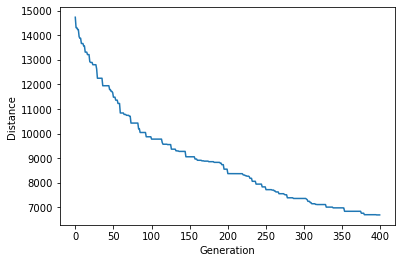

In [30]:
import matplotlib.pyplot as plt
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    for i in range(iterations):
        print(i, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        while(len(select) < population_number - elite_size):
            for j in range(population_number):
                if (random.random() < normalized_fitness[j] / sum_fitness):
                    select.append(population[j])
        # making new child from selected parents
        j = 0
        population.sort(key = fitness)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(400, 600, 0.002, 200)

after 200th iteration because it converge to some local point, i double mutation rate evry other 20 iterations to speed the search up....

[214, 150, 157, 221, 210, 147, 149, 202, 148, 42, 222, 188, 179, 140, 103, 96, 114, 35, 87, 82, 167, 159, 136, 125, 73, 76, 55, 0, 3, 4, 19, 17, 16, 60, 51, 8, 23, 58, 64, 88, 13, 24, 78, 109, 169, 120, 107, 152, 203, 209, 155, 141, 144, 145, 204, 72, 53, 26, 25, 97, 132, 162, 160, 146, 154, 128, 106, 14, 98, 61, 20, 65, 81, 69, 99, 70, 93, 30, 94, 33, 83, 122, 90, 71, 89, 175, 91, 111, 68, 85, 28, 38, 171, 92, 21, 166, 181, 135, 115, 133, 151, 129, 189, 45, 191, 184, 164, 158, 143, 165, 126, 95, 100, 161, 37, 173, 44, 192, 199, 195, 177, 41, 49, 137, 105, 66, 63, 130, 112, 108, 79, 32, 34, 168, 219, 207, 43, 190, 48, 197, 117, 131, 138, 50, 80, 119, 116, 127, 27, 54, 11, 2, 5, 15, 52, 18, 77, 9, 6, 74, 57, 75, 22, 101, 39, 142, 156, 200, 206, 205, 208, 212, 213, 123, 172, 46, 194, 183, 170, 178, 31, 187, 193, 40, 163, 110, 124, 104, 29, 10, 1, 7, 36, 198, 196, 47, 174, 139, 113, 185, 180, 121, 102, 86, 62, 225, 216, 217, 226, 224, 227, 223, 228, 12, 59, 84, 67, 56, 118, 134, 176, 182,

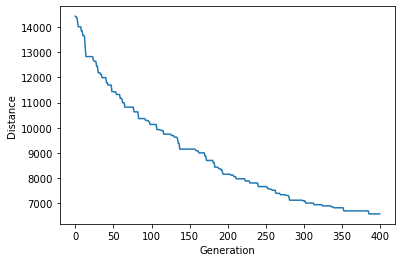

In [53]:
import matplotlib.pyplot as plt
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    for i in range(iterations):
        if (i > 200 and i%20 == 0):
            mutation_rate *= 2
        print(i, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        while(len(select) < population_number - elite_size):
            for j in range(population_number):
                if (random.random() < normalized_fitness[j] / sum_fitness):
                    select.append(population[j])
        # making new child from selected parents
        j = 0
        population.sort(key = fitness)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(400, 600, 0.001, 200)

improvement in order(time complexity) of selction with new approach 

[170, 40, 191, 184, 180, 100, 104, 150, 146, 200, 203, 202, 218, 45, 190, 187, 189, 160, 125, 116, 134, 132, 152, 41, 166, 23, 87, 64, 88, 124, 66, 55, 59, 63, 7, 20, 33, 85, 9, 67, 50, 12, 75, 69, 90, 94, 39, 176, 172, 181, 163, 135, 73, 16, 5, 56, 62, 71, 128, 171, 164, 183, 194, 47, 192, 185, 38, 42, 193, 48, 127, 129, 167, 36, 74, 53, 57, 83, 81, 65, 78, 77, 91, 17, 51, 14, 13, 82, 79, 115, 113, 123, 117, 97, 114, 103, 156, 157, 186, 177, 161, 175, 195, 182, 197, 220, 212, 214, 204, 148, 222, 173, 153, 120, 96, 76, 84, 70, 68, 95, 25, 54, 58, 22, 15, 178, 159, 155, 141, 138, 165, 60, 80, 1, 11, 3, 93, 108, 105, 118, 145, 201, 196, 147, 209, 210, 213, 215, 206, 221, 44, 72, 19, 52, 34, 37, 131, 29, 24, 28, 174, 46, 43, 179, 162, 137, 158, 151, 205, 207, 208, 144, 142, 112, 109, 169, 154, 126, 119, 32, 27, 18, 223, 217, 216, 224, 228, 227, 226, 225, 61, 198, 31, 49, 188, 130, 102, 101, 86, 107, 111, 133, 122, 121, 98, 139, 199, 219, 211, 149, 140, 168, 30, 35, 2, 10, 8, 6, 4, 0, 26, 

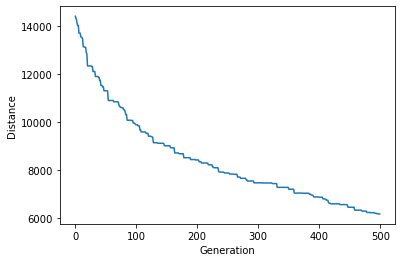

In [68]:
import matplotlib.pyplot as plt
import bisect
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    for i in range(iterations):

            
        
        print(i,mutation_rate, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        population.sort(key = fitness)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(500, 900, 0.001, 200)

[143, 144, 147, 148, 146, 150, 153, 155, 158, 159, 156, 157, 200, 201, 202, 221, 220, 218, 208, 206, 211, 210, 209, 219, 215, 213, 212, 214, 207, 205, 203, 204, 149, 154, 145, 142, 141, 139, 136, 132, 137, 128, 129, 113, 116, 117, 118, 120, 122, 121, 115, 119, 114, 111, 101, 105, 98, 100, 102, 74, 73, 92, 88, 84, 23, 24, 83, 56, 52, 53, 61, 64, 62, 55, 81, 78, 87, 79, 75, 85, 91, 93, 94, 103, 109, 123, 124, 165, 110, 125, 126, 127, 104, 96, 36, 97, 34, 35, 29, 27, 25, 26, 14, 86, 77, 67, 70, 65, 59, 57, 58, 54, 51, 50, 223, 224, 217, 216, 226, 225, 228, 227, 4, 5, 2, 1, 0, 9, 17, 10, 8, 18, 15, 20, 19, 16, 7, 6, 3, 11, 12, 13, 21, 22, 82, 60, 63, 80, 68, 71, 72, 69, 66, 76, 89, 90, 99, 112, 108, 107, 106, 95, 33, 32, 31, 41, 45, 183, 49, 188, 189, 48, 187, 192, 222, 43, 44, 42, 47, 46, 193, 190, 194, 185, 181, 196, 198, 186, 195, 197, 191, 199, 160, 161, 171, 131, 138, 151, 152, 135, 130, 170, 172, 175, 179, 180, 176, 174, 173, 164, 163, 177, 182, 184, 178, 166, 37, 30, 28, 39, 38, 40,

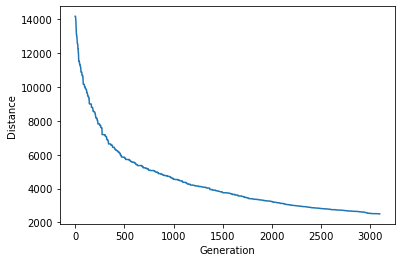

In [76]:
import matplotlib.pyplot as plt
import bisect
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    stop = True
    stop_cnt = 0
    best = 1000000
    pre = 100000000
    i = 0
    while stop:
        
        if best < 2500:
            stop = False
            
        population.sort(key = fitness)
        best = fitness(population[0])
        print(i,mutation_rate, best, fitness(population[1]), end = '\r', flush=True)
        i += 1
        
        progress.append(best)

        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        population.sort(key = fitness)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(500, 900, 0.001, 200)